#  Biomedical Data Scientist Assignment

## Loading Libraries

imported pandas, math and matplotlib libraries to work on data handling, data query and ploting graph respectiviely

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

## Importing data and cleaning with help of pandas

In [2]:
df=pd.read_table('Mudra Dataset.txt',header=None, sep = ",")
df = df.drop(10, axis=1)
df = df.drop(9, axis=1)
df = df.drop(8, axis=1)
df = df.drop(7, axis=1)
df = df.drop(6, axis=1)
df = df.drop(5, axis=1)
df = df.drop(4, axis=1)
df = df.drop(0, axis=1)
df

,1,2,3
0,26D5,FE97,FC0B
1,26D6,FE99,FC0C
2,26D6,FE9B,FC0B
3,26D5,FE97,FC0A
4,26D6,FE8E,FC10
...,...,...,...
3405,26F9,FDE8,FE6C
3406,26F9,FDE8,FE6C
3407,26F9,FDE5,FE6C
3408,26F8,FDE2,FE6C


### Converting Hexadecimal values in data to Decimal Values by Self defined function

In [3]:
def HextoDec (string):
    ret = 0
    for i,d in enumerate(string) : 
        hex = "0123456789ABCDEF"
        value= hex.index(d)
        power = (len(string) -(i+1))
        ret += (value*16**power)
    return ret

In [4]:
a = []
for i in df[1]:
    a.append(HextoDec(i)) 
b = []
for i in df[2]:
    b.append(HextoDec(i)) 
c = []
for i in df[3]:
    c.append(HextoDec(i)) 
    
df[1] = a
df[2] = b
df[3] = c

df

,1,2,3
0,9941,65175,64523
1,9942,65177,64524
2,9942,65179,64523
3,9941,65175,64522
4,9942,65166,64528
...,...,...,...
3405,9977,65000,65132
3406,9977,65000,65132
3407,9977,64997,65132
3408,9976,64994,65132


### Renaming the cloumns as x, y, z 

In [5]:
df = df.rename(columns = {1:'x',2:'y',3:'z'}, inplace=False )
df

,x,y,z
0,9941,65175,64523
1,9942,65177,64524
2,9942,65179,64523
3,9941,65175,64522
4,9942,65166,64528
...,...,...,...
3405,9977,65000,65132
3406,9977,65000,65132
3407,9977,64997,65132
3408,9976,64994,65132


## Applying the given algorithm

In [6]:
p = []
for i in df['x']:
    if i > 32767:
        i = i - 65535
    else:
        i = i
    q=i/10000
    p.append(q)
df['x'] = p
df['x']

0       0.9941
1       0.9942
2       0.9942
3       0.9941
4       0.9942
         ...  
3405    0.9977
3406    0.9977
3407    0.9977
3408    0.9976
3409    0.9976
Name: x, Length: 3410, dtype: float64

In [7]:
r = []
for i in df['y']:
    if i > 32767:
        i = i - 65535
    else:
        i = i
    q=i/10000
    r.append(q)
df['y'] = r

In [8]:
s = []
for i in df['z']:
    if i > 32767:
        i = i - 65535
    else:
        i = i
    q=i/10000
    s.append(q)
df['z'] = s

In [9]:
df

,x,y,z
0,0.9941,-0.0360,-0.1012
1,0.9942,-0.0358,-0.1011
2,0.9942,-0.0356,-0.1012
3,0.9941,-0.0360,-0.1013
4,0.9942,-0.0369,-0.1007
...,...,...,...
3405,0.9977,-0.0535,-0.0403
3406,0.9977,-0.0535,-0.0403
3407,0.9977,-0.0538,-0.0403
3408,0.9976,-0.0541,-0.0403


## Converting radian value to degree using Math Library

In [10]:
m = []
for i in df['x']:
    x = (math.acos(i)*180)/math.pi
    m.append(x)
df['x'] = m
df['x']

0       6.226979
1       6.173931
2       6.173931
3       6.226979
4       6.173931
          ...   
3405    3.886734
3406    3.886734
3407    3.886734
3408    3.970362
3409    3.970362
Name: x, Length: 3410, dtype: float64

In [11]:
n = []
for i in df['z']:
    z = (math.asin(i)*180)/math.pi
    n.append(z)
df['z'] = n
df['z']

0      -5.808276
1      -5.802517
2      -5.808276
3      -5.814035
4      -5.779481
          ...   
3405   -2.309645
3406   -2.309645
3407   -2.309645
3408   -2.309645
3409   -2.309645
Name: z, Length: 3410, dtype: float64

In [12]:
df

,x,y,z
0,6.226979,-0.0360,-5.808276
1,6.173931,-0.0358,-5.802517
2,6.173931,-0.0356,-5.808276
3,6.226979,-0.0360,-5.814035
4,6.173931,-0.0369,-5.779481
...,...,...,...
3405,3.886734,-0.0535,-2.309645
3406,3.886734,-0.0535,-2.309645
3407,3.886734,-0.0538,-2.309645
3408,3.970362,-0.0541,-2.309645


## Ploting Graph with help of Matplotlib library

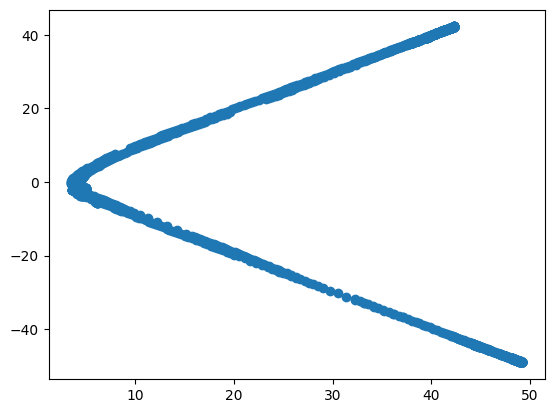

In [13]:
x = df['x']
z = df['z']
plt.scatter(x,z)
plt.show()

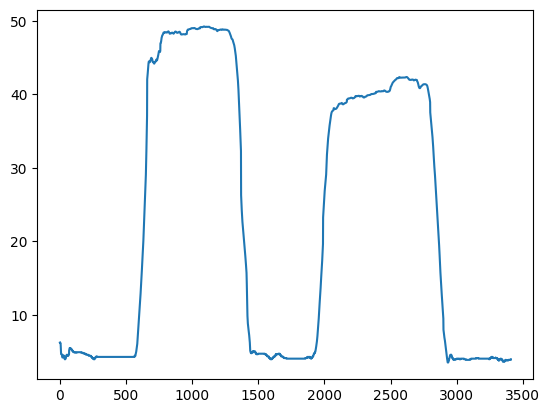

In [14]:
plt.plot(x)
plt.show()

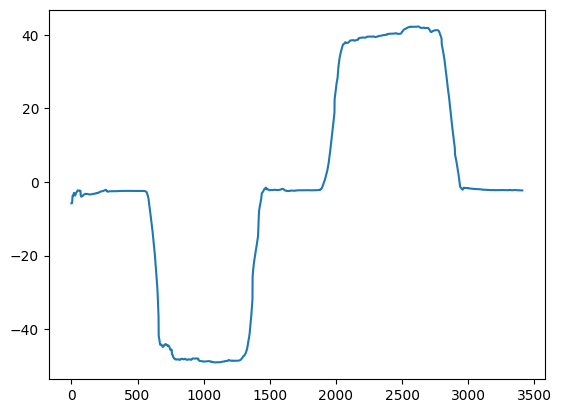

In [15]:
plt.plot(z)
plt.show()

## Applying Threshold to gain Results

In [16]:
Results = []
for i in df['x']:
    if i < 15:
        Results.append("Not Slouching")
    else:
        Results.append("Slouching")

## Results

In [17]:
df["Results"] = Results
df

,x,y,z,Results
0,6.226979,-0.0360,-5.808276,Not Slouching
1,6.173931,-0.0358,-5.802517,Not Slouching
2,6.173931,-0.0356,-5.808276,Not Slouching
3,6.226979,-0.0360,-5.814035,Not Slouching
4,6.173931,-0.0369,-5.779481,Not Slouching
...,...,...,...,...
3405,3.886734,-0.0535,-2.309645,Not Slouching
3406,3.886734,-0.0535,-2.309645,Not Slouching
3407,3.886734,-0.0538,-2.309645,Not Slouching
3408,3.970362,-0.0541,-2.309645,Not Slouching
